In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
test

,Total_Value,Year,Month,Day,Hour,Ventilation,Sokets_Plug,Lighting,Other_Electricity,Cooling,Heating
0,188.751,2021,5,21,13,53.500,23.313,33.188,61.625,9.875,7.25
1,83.001,2021,5,22,1,17.500,8.625,3.063,44.063,6.750,3.00
2,88.251,2021,5,22,4,7.250,10.563,7.313,46.000,10.375,6.75
3,80.750,2021,5,22,13,6.500,12.250,7.125,29.125,19.000,6.75
4,27.750,2021,5,22,17,2.250,6.375,3.500,0.000,11.375,4.25
...,...,...,...,...,...,...,...,...,...,...,...
139,328.688,2021,6,19,13,84.875,22.750,14.938,0.000,200.125,6.00
140,328.688,2021,6,19,20,84.875,22.750,14.938,0.000,200.125,6.00
141,328.688,2021,6,19,23,84.875,22.750,14.938,0.000,200.125,6.00
142,328.688,2021,6,20,8,84.875,22.750,14.938,0.000,200.125,6.00


In [4]:
x_train = train.iloc[:,0:5] 

y_train = train.iloc[:, 5:11]

x_test = test.iloc[:,0:5] 

y_test = test.iloc[:, 5:11]

In [5]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [6]:
x_test.drop('Year', inplace=True, axis=1)
x_train.drop('Year', inplace=True, axis=1)


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [8]:
# GENERATING THE SEQUENTIAL MODEL
model = Sequential()
model.add(Dense(20, input_dim=4, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(6))
model.compile(loss='mae', optimizer='adam')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 300)               6300      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1806      
Total params: 188,806
Trainable params: 188,806
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/500
16/16 [==============================] - 0s 8ms/step - loss: 29.1626 - val_loss: 26.6383
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 23.7694 - val_loss: 22.4440
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 20.1943 - val_loss: 19.7874
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 17.2268 - val_loss: 16.8629
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 13.1608 - val_loss: 14.1944
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 11.4908 - val_loss: 12.5006
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 10.6361 - val_loss: 11.6926
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 10.2834 - val_loss: 10.8678
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 9.7905 - val_loss: 10.2271
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 9.4149 - val_loss:

In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (20,15)
mpl.rcParams['axes.grid'] = False

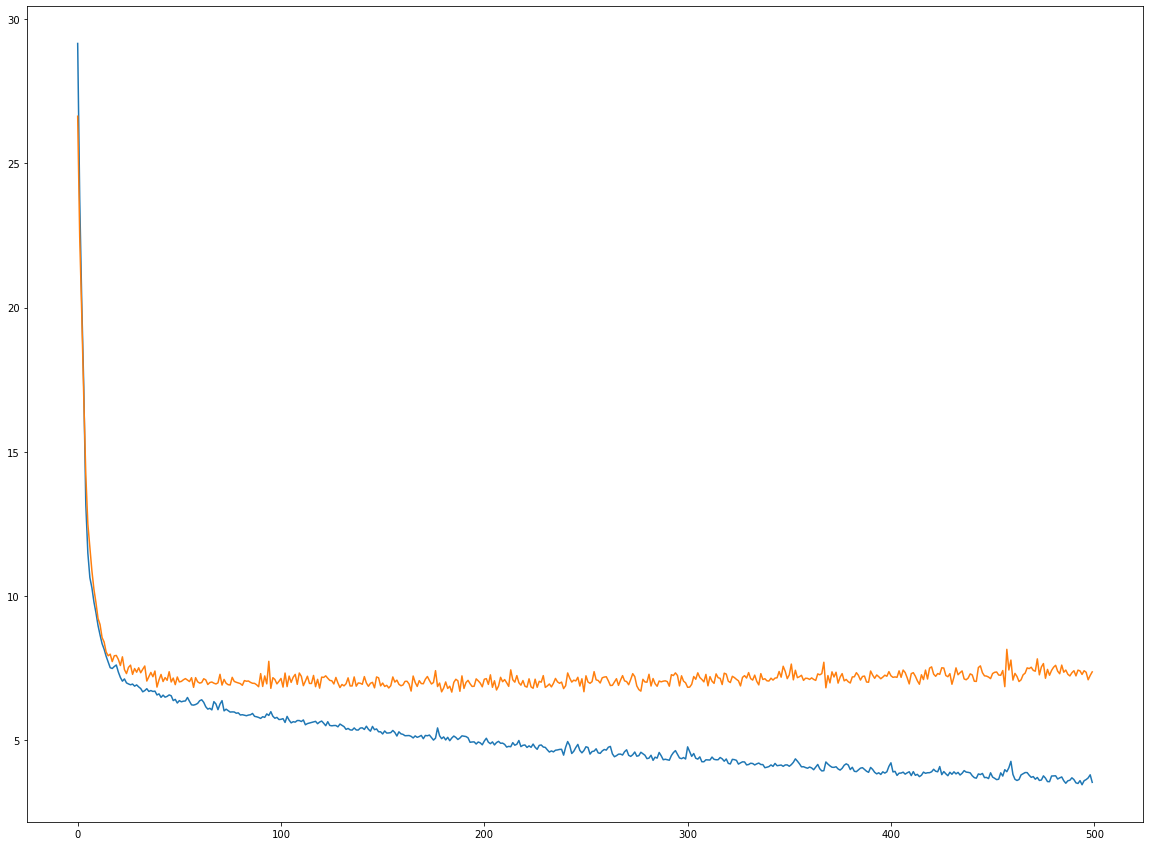

In [12]:
# PLOTTING THE GRAPH
plt.plot(history.history['loss'], label='train') #plot the loss
plt.plot(history.history['val_loss'], label='validation') #plot the validation loss


In [13]:
pred = model.predict(x_test)
pred

array([[ 5.51943054e+01,  1.85685120e+01,  2.10865898e+01,
         4.37296448e+01,  1.02987452e+01,  8.99517918e+00],
       [ 7.66771650e+00,  1.14219055e+01,  5.43806696e+00,
         4.91347733e+01,  1.02493296e+01,  3.29112506e+00],
       [ 4.86280680e+00,  9.00682354e+00,  4.44984007e+00,
         5.89712334e+01,  8.26206875e+00,  3.81802559e+00],
       [ 3.46195269e+00,  1.13457584e+01,  6.98646784e+00,
         3.01039276e+01,  1.79841709e+01,  5.93398237e+00],
       [ 6.98151052e-01,  7.98345852e+00,  8.88880634e+00,
         4.36543614e-01,  3.69070721e+00,  2.87423491e+00],
       [ 8.33960629e+00,  1.18933287e+01,  6.85783529e+00,
         6.81309280e+01,  1.47290211e+01,  4.71639585e+00],
       [ 6.89263487e+00,  1.24320593e+01,  7.26102877e+00,
         7.03082962e+01,  1.32879524e+01,  7.36540318e+00],
       [ 5.70539713e+00,  1.33850937e+01,  6.94313574e+00,
         6.63376160e+01,  1.41616001e+01,  5.62308836e+00],
       [ 5.99309826e+00,  1.43143435e+01,  7.442

In [14]:
DF = pd.DataFrame(pred)
DF.to_csv('Neural Net Output.csv')


In [15]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test['Ventilation']
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

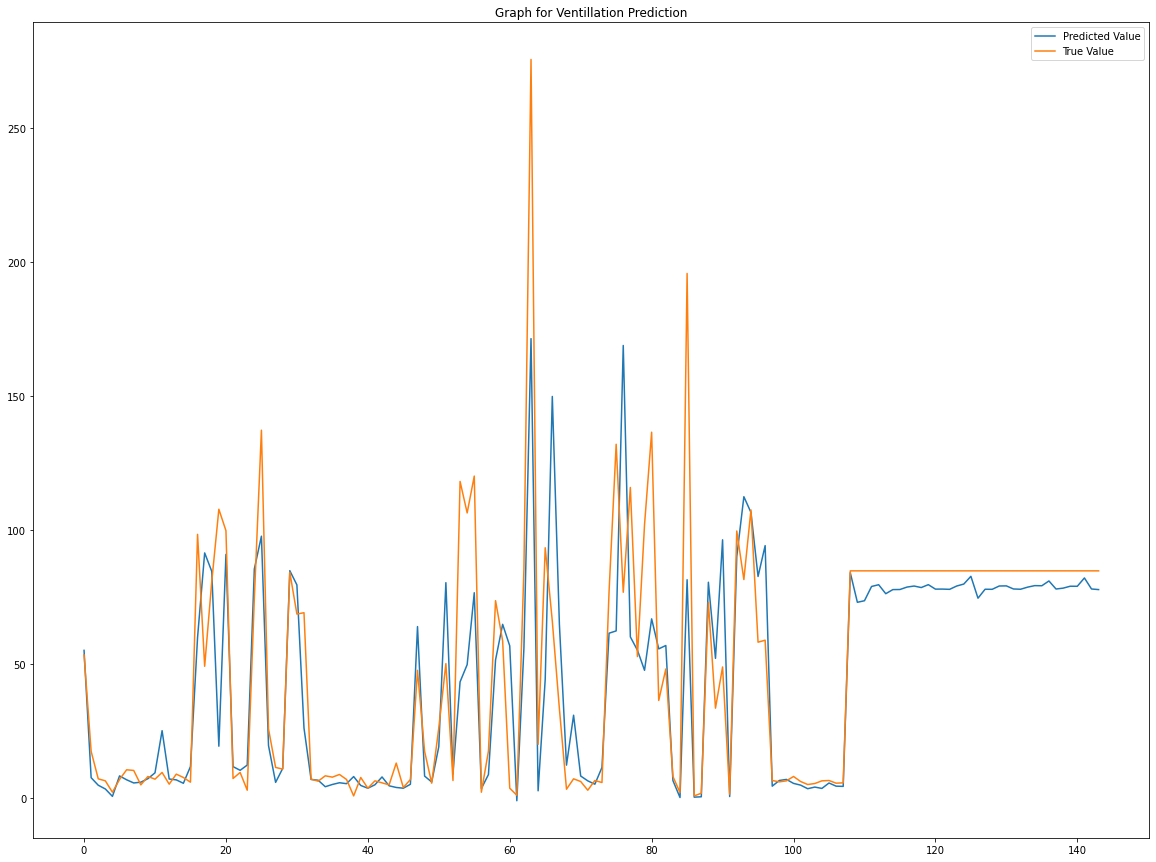

In [16]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [17]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test['Sokets_Plug']
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

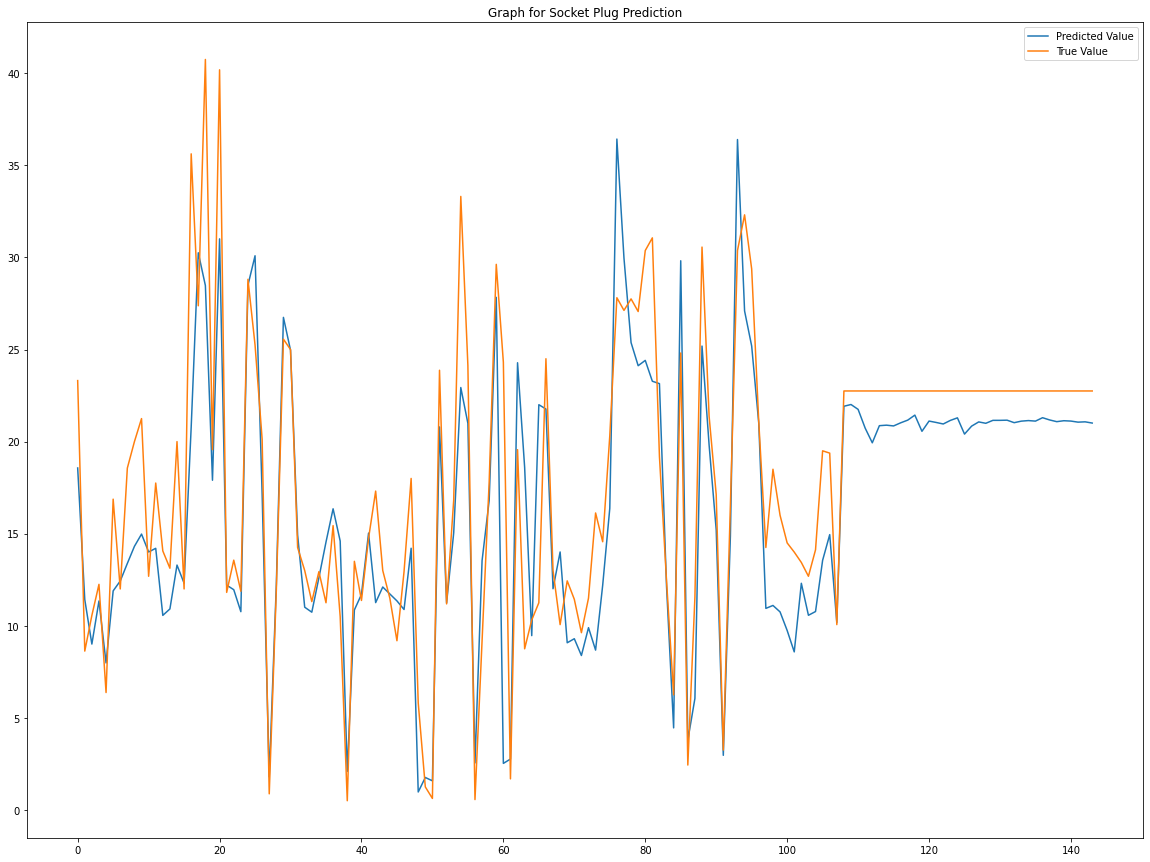

In [18]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [19]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test['Lighting']
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

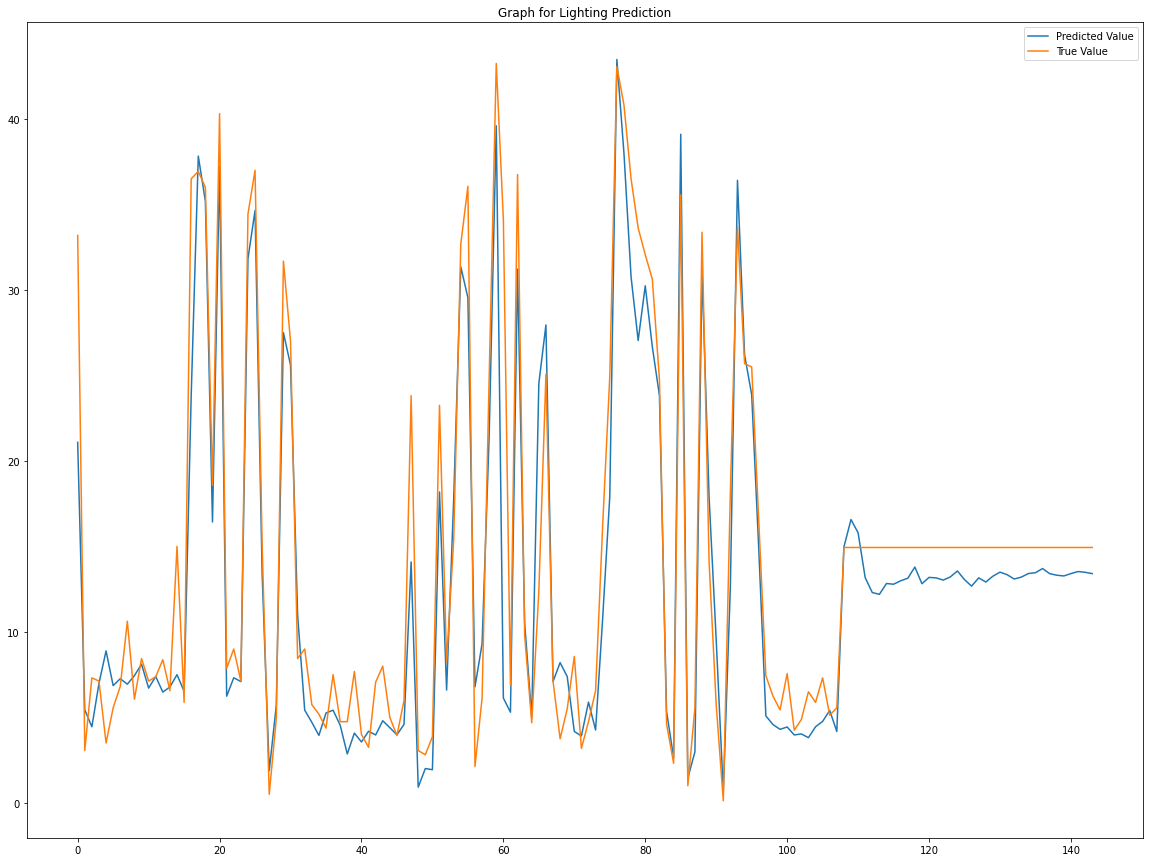

In [20]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [21]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test['Other_Electricity']
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

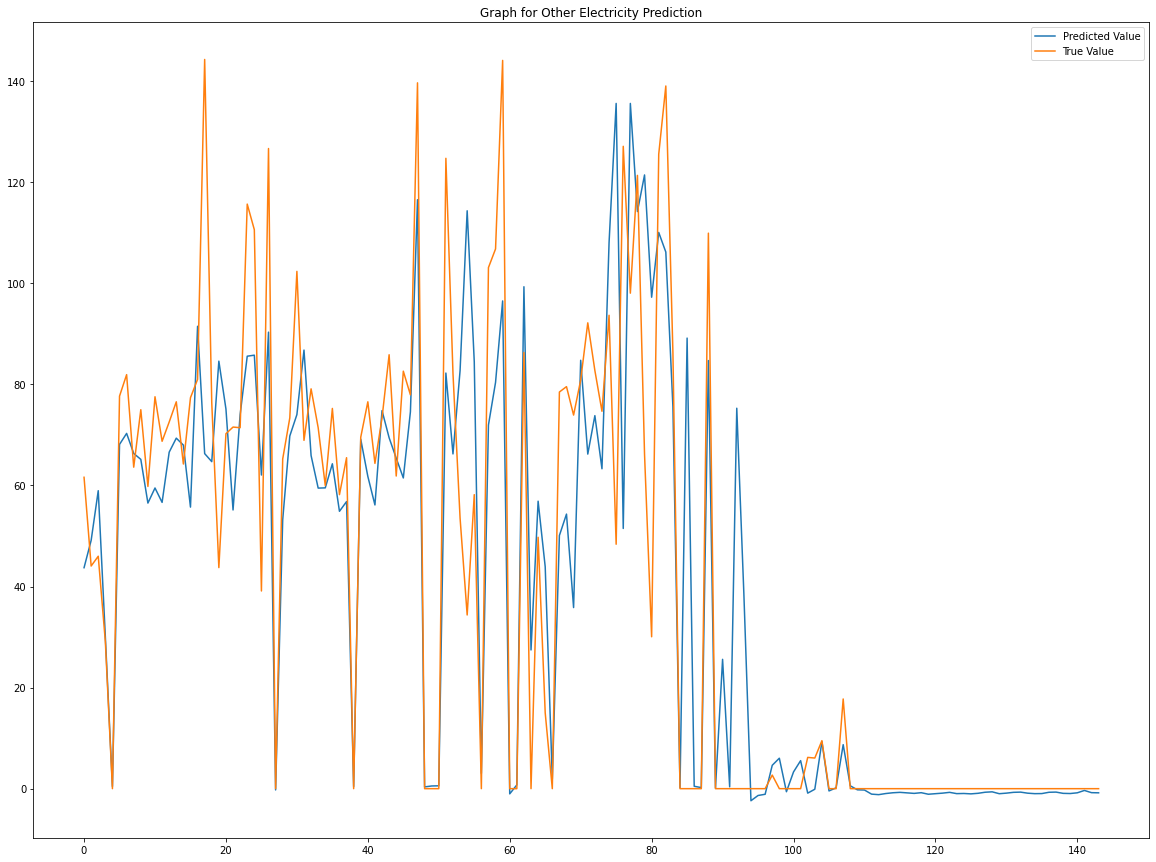

In [22]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [23]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test['Cooling']
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

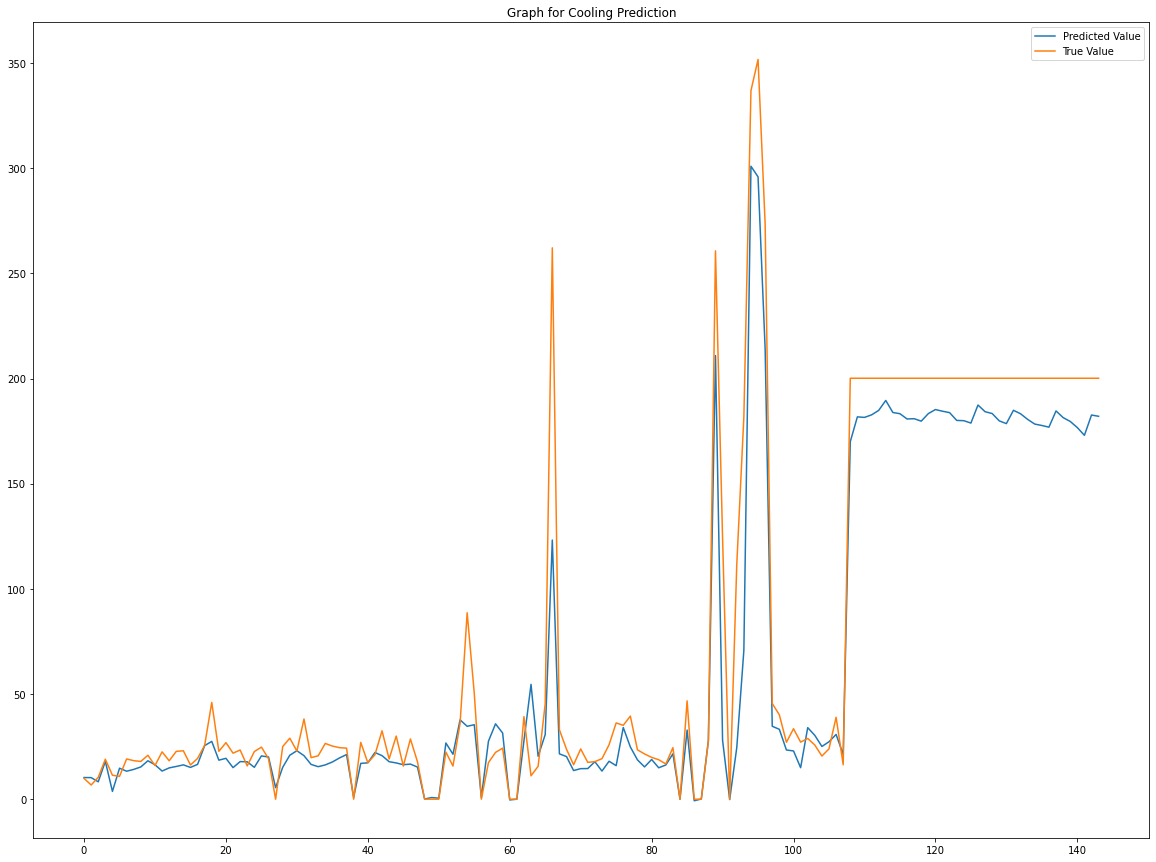

In [24]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [25]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test['Heating']
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

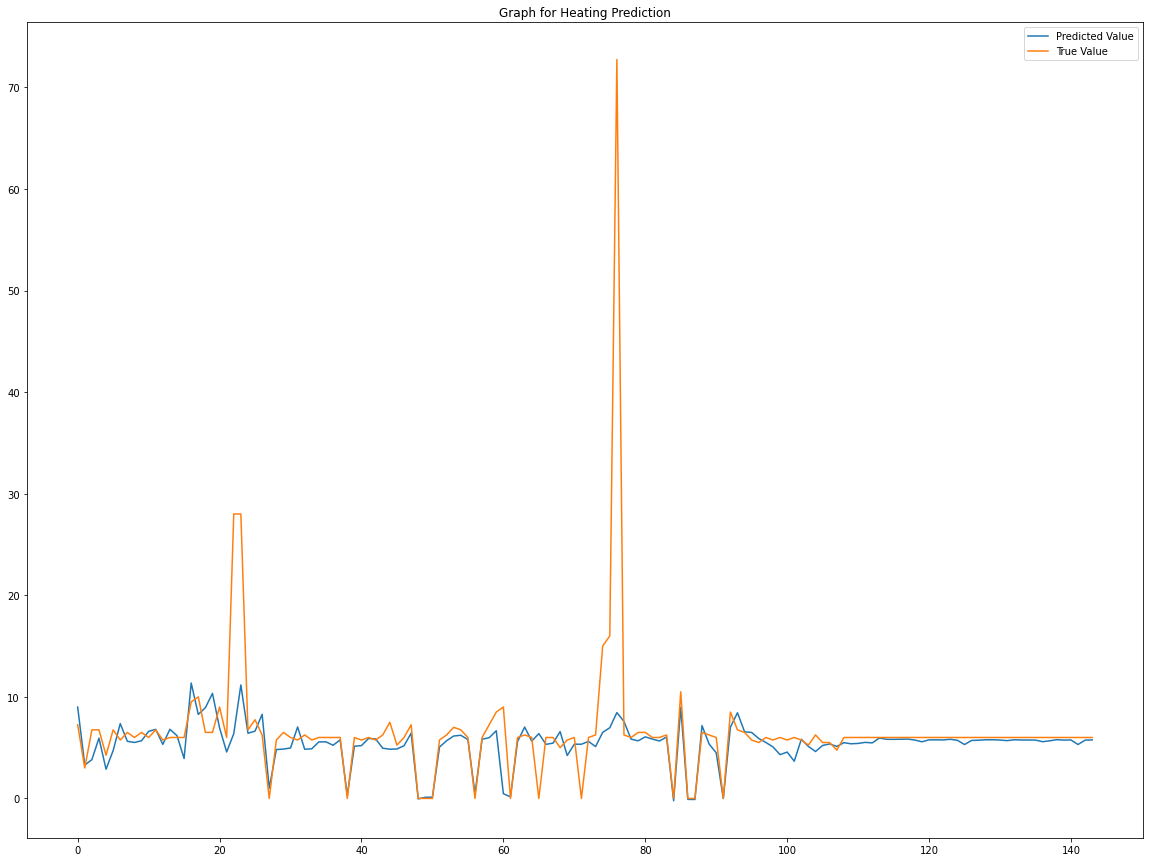

In [26]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')